## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load Dataset Files

In [0]:
import pandas as pd
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = ("/content/drive/My Drive/Colab Notebooks/")

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'Copy of train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'Copy of test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'Copy of sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'Copy of labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
labels1 = pd.read_csv('labels.csv')

In [0]:
labels=labels1.head(2000)

In [0]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [0]:
labels.shape

(2000, 2)

In [0]:
labels["breed"].value_counts()

bedlington_terrier             26
lakeland_terrier               26
bernese_mountain_dog           26
basenji                        25
blenheim_spaniel               24
                               ..
brabancon_griffon              10
wire-haired_fox_terrier        10
saint_bernard                  10
soft-coated_wheaten_terrier     8
briard                          8
Name: breed, Length: 120, dtype: int64

### Get one-hot encodings of labels

In [0]:
#num_classes=120

In [0]:
#y_test = keras.utils.to_categorical(labels, num_classes)

In [0]:
labels_ec=pd.get_dummies(labels['breed'])

In [0]:
labels_ec['id']=labels['id']

In [0]:
labels_ec.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,english_foxhound,...,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier,id
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,000bec180eb18c7604dcecc8fe0dba07
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001513dfcb2ffafc82cccf4d8bbaba97
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001cdf01b096e06d78e9e5112d419397
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,00214f311d5d2247d5dfe4fe24b2303d
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0021f9ceb3235effd7fcde7f7538ed62


## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows=128
img_cols=128
num_channel=1

In [0]:
from tqdm import tqdm
import cv2
x_feature = []
y_feature = []

for f,img in tqdm(labels.values):
  train_img = cv2.imread('./train/{}.jpg'.format(f),1)
  train_img_resize= cv2.resize(train_img, (img_rows, img_cols))
  x_feature.append(train_img_resize)
  y_feature.append(img)

100%|██████████| 2000/2000 [00:05<00:00, 335.98it/s]


In [0]:
y_feature[1]

'dingo'

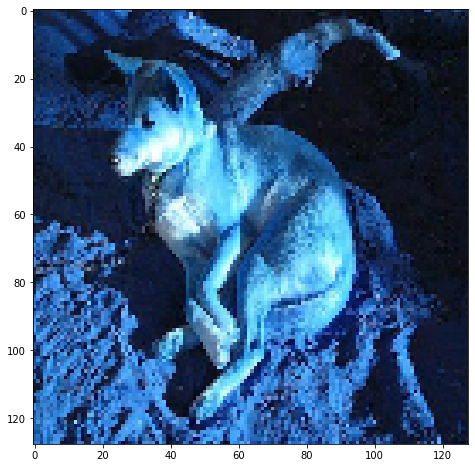

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_feature[1])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
x_data=np.array(x_feature)

In [0]:
#print(x_data)

In [0]:
x_data.dtype

dtype('uint8')

In [0]:
x_data = x_data.astype('float64')

In [0]:
x_data.dtype

dtype('float64')

In [0]:
x_data /= 255
print('x_data.shape:', x_data.shape)
print(x_data.shape[0], 'data samples')

x_data.shape: (2000, 128, 128, 3)
2000 data samples


### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
Y=labels_ec.drop(['id'],axis=1)

In [0]:
Y.head(5)

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,english_foxhound,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_data,Y,test_size=0.25,random_state=100)

In [0]:
X_train.shape

(1500, 128, 128, 3)

In [0]:
X_test.shape

(500, 128, 128, 3)

In [0]:
Y_train.shape

(1500, 120)

In [0]:
Y_test.shape

(500, 120)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
test_img1 = pd.read_csv('sample_submission.csv')

In [0]:
test_img=test_img1.head(2000) #reducing the size of test sample data to 2000

In [0]:
test_img.head(5)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

In [0]:
test_img2=test_img['id'] #taking only the id of the test data

In [0]:
test_img2.head(5)

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
2    0012a730dfa437f5f3613fb75efcd4ce
3    001510bc8570bbeee98c8d80c8a95ec1
4    001a5f3114548acdefa3d4da05474c2e
Name: id, dtype: object

In [0]:
test_img.shape

(2000, 121)

In [0]:
test_img2.shape

(2000,)

In [0]:
#test_img

In [0]:
img_rows=128
img_cols=128
num_channel=1

Run the below code to load the test image files in x_test_feature

In [0]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img2.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 0)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 2000/2000 [00:02<00:00, 781.91it/s]


Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_data=np.array(x_test_feature) #converting the 6500 test image into array

In [0]:
#print(x_test_data)

In [0]:
x_test_data.dtype

dtype('uint8')

In [0]:
x_test_data=x_test_data.astype('float64') #converting the 6500 test image array into float

In [0]:
x_test_data /= 255
print('x_test_data.shape:', x_data.shape)
print(x_test_data.shape[0], 'data samples')

x_test_data.shape: (2000, 128, 128, 3)
2000 data samples


In [0]:
x_test_data=x_test_data.reshape(x_test_data.shape[0], 128,128,1)

In [0]:
x_test_data.shape

(2000, 128, 128, 1)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
    # Define the Type of Model
    model1 = Sequential()

  # 1st Conv Layer
    model1.add(Convolution2D(5, 3, 3, input_shape=(128, 128, 3)))
    model1.add(Activation('relu'))

    # 2nd Conv Layer
    model1.add(Convolution2D(5, 3, 3))
    model1.add(Activation('relu'))

    # Fully Connected Layer
    model1.add(Flatten())
    model1.add(Dense(256))
    model1.add(Activation('relu'))

    # Prediction Layer
    model1.add(Dense(120))
    model1.add(Activation('softmax'))

    # Loss and Optimizer
    model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (3, 3), input_shape=(128, 128,...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (3, 3))`
  


In [0]:
    # Train the model1
    Output1=model1.fit(X_train, Y_train, batch_size=128, nb_epoch=10, 
              validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1500 samples, validate on 500 samples
Epoch 1/10
1500/1500 [==============================] - 1s 618us/step - loss: 4.8649 - accuracy: 0.0087 - val_loss: 4.8009 - val_accuracy: 0.0140
Epoch 2/10
1500/1500 [==============================] - 1s 459us/step - loss: 4.5283 - accuracy: 0.1227 - val_loss: 4.8574 - val_accuracy: 0.0180
Epoch 3/10
1500/1500 [==============================] - 1s 466us/step - loss: 3.9886 - accuracy: 0.2507 - val_loss: 4.9915 - val_accuracy: 0.0260
Epoch 4/10
1500/1500 [==============================] - 1s 481us/step - loss: 2.9575 - accuracy: 0.4993 - val_loss: 5.2410 - val_accuracy: 0.0080
Epoch 5/10
1500/1500 [==============================] - 1s 470us/step - loss: 1.6977 - accuracy: 0.7480 - val_loss: 5.3710 - val_accuracy: 0.0080
Epoch 6/10
1500/1500 [==============================] - 1s 462us/step - loss: 0.8106 - accuracy: 0.9060 - val_loss: 5.5803 - val_accuracy: 0.0180
Epoch 7/10
1500/1500 [==============================] - 1s 462us/step - loss:

### Use batch_size = 128 and epochs = 10 and execute the model

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from matplotlib import pyplot as plt

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
#datagen.fit(X_train)

In [0]:
#plt.imshow(X_train[2].squeeze(), cmap='gray')
#plt.plot()

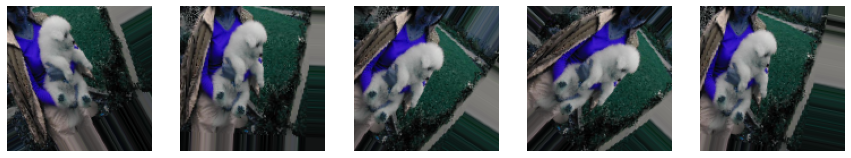

In [0]:
gen = datagen.flow(X_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
datagen.fit(X_train)

In [0]:
datagen.fit(X_test)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
    # Define Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(5, 3, 3, input_shape=(128, 128, 3)))
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(5, 3, 3))
    model3.add(Activation('relu'))

    # Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model3.add(Dropout(0.15))

    # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(256))
    model3.add(Activation('relu'))
    
    # More Dropout
    model3.add(Dropout(0.2))

    # Prediction Layer
    model3.add(Dense(120))
    model3.add(Activation('softmax'))

    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (3, 3), input_shape=(128, 128,...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (3, 3))`
  


In [0]:
model3.fit_generator(datagen.flow(X_train, Y_train,batch_size=32),
                    samples_per_epoch=X_train.shape[0],
                    nb_epoch=10,
                    validation_data=(X_test, Y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=46, epochs=10)`
  after removing the cwd from sys.path.


Epoch 1/10
46/46 [==============================] - 5s 115ms/step - loss: 4.8939 - accuracy: 0.0089 - val_loss: 4.7889 - val_accuracy: 0.0020
Epoch 2/10
 2/46 [>.............................] - ETA: 2s - loss: 4.7864 - accuracy: 0.0469

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


46/46 [==============================] - 5s 108ms/step - loss: 4.7829 - accuracy: 0.0136 - val_loss: 4.7903 - val_accuracy: 0.0040
Epoch 3/10
46/46 [==============================] - 5s 110ms/step - loss: 4.7782 - accuracy: 0.0157 - val_loss: 4.7983 - val_accuracy: 0.0060
Epoch 4/10
46/46 [==============================] - 5s 112ms/step - loss: 4.7702 - accuracy: 0.0136 - val_loss: 4.7899 - val_accuracy: 0.0040
Epoch 5/10
46/46 [==============================] - 5s 111ms/step - loss: 4.7604 - accuracy: 0.0116 - val_loss: 4.8523 - val_accuracy: 0.0140
Epoch 6/10
46/46 [==============================] - 5s 113ms/step - loss: 4.7356 - accuracy: 0.0184 - val_loss: 4.8273 - val_accuracy: 0.0080
Epoch 7/10
46/46 [==============================] - 5s 110ms/step - loss: 4.7026 - accuracy: 0.0123 - val_loss: 4.7955 - val_accuracy: 0.0140
Epoch 8/10
46/46 [==============================] - 5s 110ms/step - loss: 4.6590 - accuracy: 0.0184 - val_loss: 4.8237 - val_accuracy: 0.0180
Epoch 9/10
46/46 

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [0]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
    # Define Model
    model2 = Sequential()
    model2.add(base_model)

    # Fully Connected Layer
    #model2.add(Flatten())
    model2.add(Dense(1024))
    model2.add(Activation('relu'))

    # Prediction Layer
    model2.add(Dense(120))
    model2.add(Activation('softmax'))

    # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1500 samples, validate on 500 samples
Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 4.8807 - accuracy: 0.0067 - val_loss: 4.8259 - val_accuracy: 0.0060
Epoch 2/10


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1500/1500 [==============================] - 4s 3ms/step - loss: 4.7773 - accuracy: 0.0087 - val_loss: 4.8037 - val_accuracy: 0.0140
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 4.7621 - accuracy: 0.0093 - val_loss: 4.8352 - val_accuracy: 0.0120
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 4.7701 - accuracy: 0.0113 - val_loss: 4.8241 - val_accuracy: 0.0120
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 4.7632 - accuracy: 0.0100 - val_loss: 4.9126 - val_accuracy: 0.0100
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 4.7598 - accuracy: 0.0147 - val_loss: 4.8335 - val_accuracy: 0.0080
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 4.7568 - accuracy: 0.0153 - val_loss: 4.8074 - val_accuracy: 0.0080
Epoch 8/10
1500/1500 [==============================] - 4s 3ms/step - loss: 4.7591 - accuracy: 0.0153 - val_loss: 4.8412 - val_accuracy: 0.0060
Epo

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
for layer in base_model.layers[:20]:
  layer.trainabl

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
    # Train the model
    Output2=model2.fit(X_train, Y_train, batch_size=128, nb_epoch=10, 
              validation_data=(X_test, Y_test), callbacks=callback_list)